In [11]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from helper_code_qutip import * 
import scipy.io

In [2]:
matlab_data1 = scipy.io.loadmat('../matlab/data_plotting_vs_g/data_2_4_1.mat',mat_dtype=False)
matlab_data2 = scipy.io.loadmat('../matlab/data_plotting_vs_g/data_2_4_2.mat',mat_dtype=False)  # is set to True, givex complex casting to real errors..

In [5]:
betalist1 = matlab_data1['betalist'][0]
betalist2 = matlab_data2['betalist'][0]

delta = matlab_data1['delta'][0][0]
gvals = matlab_data1['gvals'][0]

super_gamma_matrices1 = matlab_data1['super_gamma_matrices'][0]
super_ls_matrices1 = matlab_data1['super_lamb_shift_matrices'][0]

super_gamma_matrices2 = matlab_data2['super_gamma_matrices'][0]
super_ls_matrices2 = matlab_data2['super_lamb_shift_matrices'][0]

NL1 = int(matlab_data1["NL"][0,0])
NL2 = int(matlab_data2["NL"][0,0])
NM = int(matlab_data2["NM"][0,0])

print('NL and NM are ', NL1, NM, 'respectively')

N = NL1 + NM
dL1 = 2**NL1
dL2 = 2**NL2
dM = 2**NM
d = 2**N
dims = [2]*N

print(super_gamma_matrices1[0].shape)
print(super_gamma_matrices2[0].shape)

print(betalist1)
print(betalist2)

print(delta)
print(gvals)

NL and NM are  2 4 respectively
(1, 20)
(1, 20)
[2.5        1.42857143 1.        ]
[10]
0.01
[0.001      0.00147368 0.00194737 0.00242105 0.00289474 0.00336842
 0.00384211 0.00431579 0.00478947 0.00526316 0.00573684 0.00621053
 0.00668421 0.00715789 0.00763158 0.00810526 0.00857895 0.00905263
 0.00952632 0.01      ]


In [7]:
def matrix_transform(dL,gamma_matrix,ls_matrix):
    gamma_matr = np.zeros((dL**2-1,dL**2-1), dtype = complex)
    ls_matr = np.zeros((dL,dL), dtype = complex)

    for i in range(dL**2-1):
        for j in range(dL**2-1):
            gamma_matr[i,j] = gamma_matrix[i,j]

    for i in range(dL):
        for j in range(dL):
            ls_matr[i,j] = ls_matrix[i,j]

    return gamma_matr, ls_matr


fin_gamma_matrices1 = [0]*len(betalist1)
fin_ls_matrices1 = [0]*len(betalist1)

fin_gamma_matrices2 = [0]*len(betalist2)
fin_ls_matrices2 = [0]*len(betalist2)

for i in range(len(betalist1)):
    temp_list1 = [0]*len(gvals)
    temp_list2 = [0]*len(gvals)
    for j in range(len(gvals)):
        temp_list1[j], temp_list2[j] = matrix_transform(dL1,super_gamma_matrices1[i][0][j],super_ls_matrices1[i][0][j])
    fin_gamma_matrices1[i], fin_ls_matrices1[i] = temp_list1, temp_list2

for i in range(len(betalist2)):
    temp_list1 = [0]*len(gvals)
    temp_list2 = [0]*len(gvals)
    for j in range(len(gvals)):
        temp_list1[j], temp_list2[j] = matrix_transform(dL2,super_gamma_matrices2[i][0][j],super_ls_matrices2[i][0][j])
    fin_gamma_matrices2[i], fin_ls_matrices2[i] = temp_list1, temp_list2

In [8]:
print(fin_ls_matrices2[0][12])

[[ 1.47323182e-09+0.00000000e+00j -3.72839259e-11-1.03753591e-09j
  -1.72892506e-10-2.34804026e-09j  2.31796943e-10+2.13929115e-09j]
 [-3.72839259e-11+1.03753591e-09j -1.45128612e-09+0.00000000e+00j
   1.04512463e-09-8.95617901e-09j -2.19512389e-09+3.86479349e-09j]
 [-1.72892506e-10+2.34804026e-09j  1.04512463e-09+8.95617901e-09j
   1.13104168e-09+0.00000000e+00j  1.17789848e-09+4.04645376e-09j]
 [ 2.31796943e-10-2.13929115e-09j -2.19512389e-09-3.86479349e-09j
   1.17789848e-09-4.04645376e-09j  4.12588602e-10+0.00000000e+00j]]


In [9]:
matlab_data3 = scipy.io.loadmat('../matlab/thermal_data_new_1.mat',mat_dtype=False)

In [12]:
matlab_F_list1 = matlab_data3["F1"]
F_list1 = []

matlab_F_list2 = matlab_data3["F2"]
F_list2 = []


for index in range(2**dL1):
    matrix1 = np.asmatrix(matlab_F_list1[0,index])
    matrix2 = np.asmatrix(matlab_F_list2[0,index])

    F_list1.append(Qobj(matrix1))
    F_list2.append(Qobj(matrix2))
    
if not basis_is_orthonormal(F_list1):
    print("WARNING : Basis 1 is NOT orthonormal")

if not basis_is_orthonormal(F_list2):
    print("WARNING : Basis 2 is NOT orthonormal")

F_list1.pop() #removes the last indentity basis ..
print(F_list2[-1]) # should be identity matrix
F_list2.pop()

for index in range(2**dL1-1):
    F_list1[index].dims = [dims,dims] # makes sure mutliplication will work and QuTiP wont throw errors. 
    F_list2[index].dims = [dims,dims]

Quantum object: dims=[[64], [64]], shape=(64, 64), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.125 0.    0.    ... 0.    0.    0.   ]
 [0.    0.125 0.    ... 0.    0.    0.   ]
 [0.    0.    0.125 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.125 0.    0.   ]
 [0.    0.    0.    ... 0.    0.125 0.   ]
 [0.    0.    0.    ... 0.    0.    0.125]]


In [13]:
w0list = matlab_data2["w0list2"][:,0]
w0list = w0list.astype('float')
print('w0list is ', w0list)

glist = matlab_data1["glist"][:,0]
glist = glist.astype('float')

print('glist is', glist)

w0list is  [1.   1.   1.   1.01 1.01 1.01]
glist is [0.01 0.01 0.01 0.01 0.01]


In [14]:
p_c= 1.1e-2
p_h= 1e-3

In [15]:
def steady_state_calc(H_S,beta1, g, gamma_matrix1, gamma_matrix2, ls_matrix1, ls_matrix2):

    
    [D1,U1] = np.linalg.eigh(gamma_matrix1)
    [D2,U2] = np.linalg.eigh(gamma_matrix2)

    L_list1 = []
    Udagger1 = np.transpose(np.conj(U1))
    L_list2 = []
    Udagger2 = np.transpose(np.conj(U2))

    for j  in range(dL1**2-1):
        op1 = 0
        op2 = 0
        for betaindex in range(dL1**2-1):    
            op1 = op1+Udagger1[j,betaindex]* F_list1[betaindex]
            op2 = op2+Udagger2[j,betaindex]* F_list2[betaindex]
        L_list1.append(op1)
        L_list2.append(op2)

    tildeL_list1 = []
    tildeL_list2 = []

    for index in range(dL1**2-1):
        tildeL_list1.append(np.sqrt(p_h*D1[index])*L_list1[index])
        tildeL_list2.append(np.sqrt(p_c*D2[index])*L_list2[index])

    tildeL_list = []
    for i in tildeL_list1:
        tildeL_list.append(i)

    for i in tildeL_list2:
        tildeL_list.append(i)

    H_LS1 = tensor(Qobj(ls_matrix1),qeye(dM))
    H_LS2 = tensor(qeye(dM),Qobj(ls_matrix2))
    H_LS1.dims = [dims,dims]
    H_LS2.dims = [dims,dims]
    
    L_operator = liouvillian(H_S+H_LS1+H_LS2, tildeL_list)
    rho_ss = steadystate(L_operator)

    L_eigen = L_operator.eigenenergies()

    print("Smallest eigenvalues for Th = ", 1/beta1, "and g = ", g, "are ",L_eigen[-3:])

    return rho_ss

In [16]:
cvx_ss = []

for i in range(len(betalist1)):
    list1 = []
    for j in range(len(gvals)):
        g = gvals[j]
        glist = np.linspace(g,g,N-1)
        w0list = np.zeros(N)
        w0list[0] = 1
        w0list[1] = 1
        w0list[2] = 1
        w0list[3] = 1 + delta
        w0list[4] = 1 + delta
        w0list[5] = 1 + delta
        H_S = create_hamiltonian2(w0list, glist,N)
        rho_ss = steady_state_calc(H_S,betalist1[i],g,fin_gamma_matrices1[i][j],fin_gamma_matrices2[0][j],fin_ls_matrices1[i][j],fin_ls_matrices2[0][j])
        list1.append(rho_ss)
    cvx_ss.append(list1)

Smallest eigenvalues for Th =  0.4 and g =  0.001 are  [-4.95349481e-06+9.98562925e-01j -4.95349481e-06-9.98562925e-01j
 -2.04294825e-16-1.33620836e-17j]
Smallest eigenvalues for Th =  0.4 and g =  0.00147368 are  [-4.93522021e-06+9.97867939e-01j -4.93522021e-06-9.97867939e-01j
 -8.25798901e-17+1.47071080e-17j]
Smallest eigenvalues for Th =  0.4 and g =  0.00194737 are  [-4.81816003e-06-9.97164955e-01j -4.81816003e-06+9.97164955e-01j
 -1.36667887e-16+4.46357906e-18j]
Smallest eigenvalues for Th =  0.4 and g =  0.00242105 are  [-4.89633896e-06+9.96454646e-01j -4.89633895e-06-9.96454646e-01j
 -7.02869355e-16+7.93239232e-16j]
Smallest eigenvalues for Th =  0.4 and g =  0.00289474 are  [-5.05022951e-06+3.26156900e-16j -2.47823924e-06-3.05660722e-16j
 -9.82296269e-16+2.54836088e-15j]
Smallest eigenvalues for Th =  0.4 and g =  0.00336842 are  [-6.56243949e-06-9.95014053e-01j -4.31672558e-06+8.53103394e-17j
 -3.44481238e-17-5.58143129e-18j]
Smallest eigenvalues for Th =  0.4 and g =  0.00384

In [17]:
print(cvx_ss)

[[Quantum object: dims=[[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape=(64, 64), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1.70576547e-16+0.00000000e+00j  2.46466282e-23-1.85363831e-21j
   1.20251013e-22+1.32364582e-22j ... -1.61451391e-31-1.11755672e-30j
   1.72538045e-32+1.13995895e-31j  2.64022005e-35+1.47487050e-34j]
 [ 2.46466282e-23+1.85363831e-21j  7.39943377e-13+0.00000000e+00j
  -2.87921602e-15+5.69788549e-16j ... -5.21243275e-28+8.15138514e-29j
   5.44911376e-29-8.27122549e-30j -3.41248040e-34-3.87090441e-34j]
 [ 1.20251013e-22-1.32364582e-22j -2.87921602e-15-5.69788549e-16j
   7.39628934e-13+0.00000000e+00j ...  1.10970008e-24-1.61913256e-25j
  -1.13057301e-25+1.78782727e-26j  3.23898765e-32+2.35503613e-31j]
 ...
 [-1.61451391e-31+1.11755672e-30j -5.21243275e-28-8.15138514e-29j
   1.10970008e-24+1.61913256e-25j ...  3.99760125e-05+0.00000000e+00j
  -1.08037785e-06+1.70965171e-08j  1.71905092e-09+1.87954887e-09j]
 [ 1.72538045e-32-1.13995895e-31j  5.44911376e-29+8.

In [19]:
reduced_cvx_ss = []
#Take the partial trace, leaving only the middle two qubits
for i in range(len(betalist1)):
    list1 = []
    for j in range(len(gvals)):
        rho_ss = cvx_ss[i][j]
        rho_ss = rho_ss.ptrace([2,3])
        list1.append(rho_ss)
    reduced_cvx_ss.append(list1)

In [20]:
print(reduced_cvx_ss[0][0])

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 3.75377391e-06+0.00000000e+00j -1.68962188e-13-3.74724184e-12j
   1.71020476e-14+3.99195048e-13j -9.28081907e-18-1.65794202e-16j]
 [-1.68962188e-13+3.74724184e-12j  7.50934526e-02+0.00000000e+00j
  -7.58117849e-03+5.13397975e-08j  7.84193088e-13+4.04736591e-10j]
 [ 1.71020476e-14-3.99195048e-13j -7.58117849e-03-5.13397975e-08j
   8.11643077e-04+0.00000000e+00j -1.98487700e-12+1.10467136e-12j]
 [-9.28081907e-18+1.65794202e-16j  7.84193088e-13-4.04736591e-10j
  -1.98487700e-12-1.10467136e-12j  9.24091151e-01+0.00000000e+00j]]


In [23]:
def concurrence_plot(Th_list,gvals,reduced_dm_list):
    for i in range(len(Th_list)):
        concurrence_list = []
        for j in range(len(gvals)):
            concurrence_list.append(concurrence(reduced_dm_list[i][j]))
            #print(f'Concurrence Qutip for Tc = {Tc_list[i]} and Th = {round(Th_list[j],2)}: ',concurrence(reduced_dm_list[i][j]))
        plt.plot(gvals,concurrence_list,label='Th/Eh = '+str(Th_list[i]))
        ##save the data
        np.save(f'CVX_data/concurrence_data_g_{i}',concurrence_list)

    plt.xlabel('g/Eh')
    plt.ylabel('Concurrence')
    plt.title(f'Concurrence (CVX) for different Th at e = {delta}, ph = 1e-3, pc = 1.1e-2')
    plt.legend()

    plt.show()


def negativity1(rho):
    a1 = rho[0,0]
    a4 = rho[3,3]
    c = np.abs(rho[1,2])
    val = 0.5*(np.sqrt(4*c**2 + (a1-a4)**2) - (a1+a4))  #How did it know the function?? Very cool
    if val < 0:
        return 0
    else:
        return val

def negativity_plot(Th_list,elist,reduced_dm_list):
    for i in range(len(Th_list)):
        neg_list = []
        for j in range(len(elist)):
            neg_list.append(negativity1(reduced_dm_list[i][j]))
        plt.plot(elist,neg_list,label='Th/Eh = '+str(Th_list[i]))

    plt.xlabel('delta/Eh')
    plt.ylabel('Negativity')
    plt.title(f'Negativity (LLE) for different Th at g = {g}, ph = 1e-3, pc = 1.1e-2')
    plt.legend()

    plt.show()

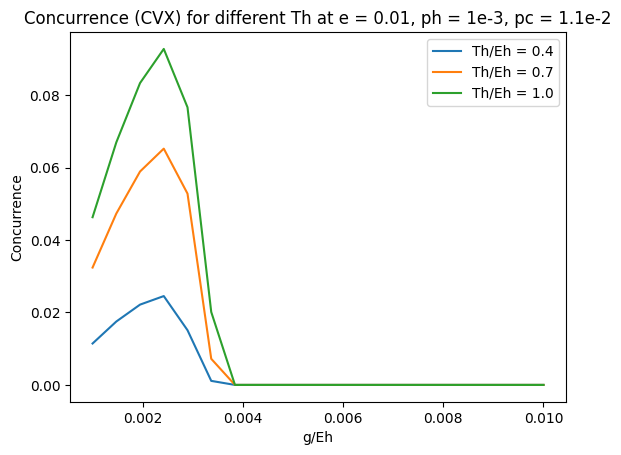

In [24]:
Th_list = [1/val for val in betalist1]
concurrence_plot(Th_list,gvals,reduced_cvx_ss)

In [25]:
beta1 = 1/0.1 

In [26]:
def dissipator(op,rho):
    return op*rho*op.dag() - 0.5*op.dag()*op*rho - 0.5*rho*op.dag()*op

def heat_current_h(rho,beta2,g,e):
    gammah_plus =  p_h*nbar(1,beta2,0)
    gammah_minus = p_h*(nbar(1,beta2,0)+1)

    op1 = create_sm(2,1).dag()

    op_com = gammah_plus*dissipator(op1,rho) + gammah_minus*dissipator(op1.dag(),rho)
    H_S=create_hamiltonian2([1,1+e],[g,g],2)

    return (H_S*op_com).tr()

def heat_current_c(rho,g,e):
    gammac_plus = p_c*nbar(1+e,beta1,0)  #beta1 is fixed at 1/0.1
    gammac_minus = p_c*(nbar(1+e,beta1,0)+1)

    op2 = create_sm(2,2).dag()

    op_com = gammac_plus*dissipator(op2,rho) + gammac_minus*dissipator(op2.dag(),rho)
    H_S=create_hamiltonian2([1,1+e],[g,g],2)

    return (H_S*op_com).tr()

In [32]:
def curr_plot(Th_list,gvals,reduced_dm_list1):
    red_neg = []
    for i in range(len(Th_list)):
        neg_list1 = []
        #neg_list2 = []
        for j in range(len(gvals)):
            neg_list1.append(heat_current_h(reduced_dm_list1[i][j],betalist1[i],gvals[j],delta) - heat_current_c(reduced_dm_list1[i][j],gvals[j],delta))
            #neg_list2.append(heat_current_h(reduced_dm_list2[i][j],betalist2[i],gvals[j],e) - heat_current_c(reduced_dm_list2[i][j],gvals[j],e))
        plt.plot(gvals,neg_list1,'-',label='Th/Eh = '+str(Th_list[i]) + ',CVX')
        np.save(f'CVX_data/curr_data_g_{i}',neg_list1)
        #plt.plot(gvals,neg_list2,'--',label='Th/Eh = '+str(Th_list[i])+ ",RE")
        #red_neg.append(neg_list2)

    plt.xlabel('g/Eh')
    plt.ylabel('Heat current')
    #plt.xscale('log')
    plt.title(f'Current comp for different Th at e = {delta}, ph = 1e-3, pc = 1.1e-2')
    plt.legend()

    plt.show()

    #return red_neg #return redfield currents

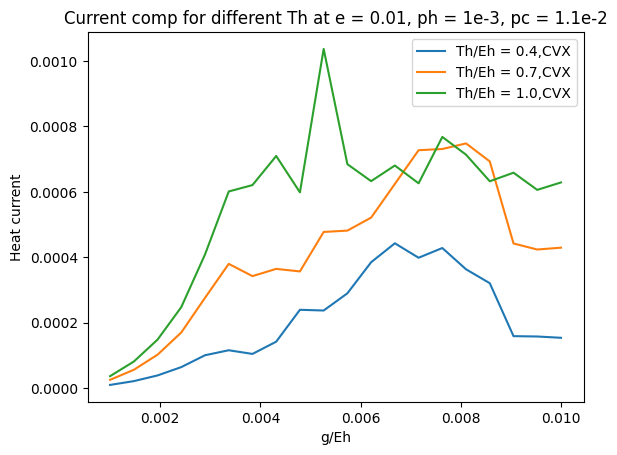

In [34]:
curr_plot(Th_list,gvals,reduced_cvx_ss)